In [1]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D
# from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.losses import SparseCategoricalCrossentropy
from keras.layers import Flatten
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy

In [2]:
UNK_IMG_PATH = "./RSS/Unknown_Machinery.jpg"
IMGS_PATH = "./RSS/Image_Datasets"

In [3]:
def getImagesPaths(IMGS_PATH):
    dirs = np.array(os.listdir(IMGS_PATH))
    cwd = os.getcwd()
    
    imgs_dirs = np.array([os.path.join(cwd, IMGS_PATH, i).replace('\\', '/') for i in dirs])
    files = np.array([os.listdir(i) for i in imgs_dirs])
    
    imgs_paths = np.array(list(map(lambda dir, file: [
        [os.path.join(imgs_dirs[i], files[i][j]).replace('\\', '/') for j in range(len(files[0]))] for i in
        range(len(dirs))], dirs, files)))
    return imgs_paths[0]
getImagesPaths(IMGS_PATH)

array([['E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler1.jpg',
        'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler10.jpg',
        'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler2.jpg',
        'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler3.jpg',
        'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler4.jpg',
        'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler5.jpg',
        'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler6.jpg',
        'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler7.jpg',
        'E:/Dutech Internship/Projects/

In [4]:
def readImageBits(IMGS_PATH):
    PATHS = getImagesPaths(IMGS_PATH)
    machinery_class_names = [list(set([os.path.basename(os.path.dirname(i)) for i in j])) for j in PATHS]
    print(machinery_class_names)
    print(PATHS.shape)
    data, labels = np.array([]), np.full((PATHS.shape[0], PATHS.shape[1]), ' ' * 30)
#     np.array([[' ' * 30] * PATHS.shape[1]] * PATHS.shape[0])
    
    
    for i in PATHS:
        data = np.append(data, i)
    
    
    
#     print(labels)
#     print(labels.shape)
#     labels[0, 0] = [1, 2, 3]
#     print(labels[0, 1])
# #     labels[1]= [2, 5, 4]
#     print(labels)
    
#     for i in range(len(PATHS)):
#         for j in range(len(PATHS[i])):
# #             print(cv.imread(PATHS[i, j]))
# #             data = np.append(data, [[cv.imread(PATHS[i, j])]], axis = None)
#             data[i, j] = 
#             print(data)
#             if j == 1: break
#             else: continue
#             labels = np.append(labels, machinery_class_names[i])
#     print(zip(cv.imre))

    rows = PATHS.shape[0]
    i = np.arange(rows)
    cols = PATHS[i].shape[1]
    j = np.arange(cols)
    print(i.shape)
    print(j.shape)
#     print(PATHS[0, 0])
#     t = cv.imread(PATHS[0, 0])
#     print(t)
#     print(PATHS[0])
    print(data)
    data_bits = []
    for m in data:
        data_bits.append(cv.imread(m))
#     data = np.vectorize(lambda x: cv.imread(x))(data[0])
#     for m in i:
#         for n in j:
#             data = np.append(data[m], cv.imread(PATHS[m][n]))
#             break
#         print(data)
#     data = cv.imread(PATHS[0])


#     data = np.vectorize(lambda x: cv.imread(x))(PATHS[0])
    


    for m in i:
        print(m)
        labels[m] = np.repeat(machinery_class_names[m], j.shape[0])
#         labels = np.append(labels, label)
    print(labels)
    
#     labels_reduced = np.transpose(np.array([[labels[m][n] for m in i] for n in j]))
#     labels_reduced = labels

    labels = labels.flatten()
    
    data_bits = np.array(data_bits)
    
    
    
    
    return data_bits, labels
x, y = readImageBits(IMGS_PATH)
x, y
# cv.imread("./RSS/Image_Datasets/Air Cooler/cooler1.jpg")

[['Air Cooler'], ['Electric Motor'], ['Refrigerator']]
(3, 10)
(3,)
(10,)
['E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler1.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler10.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler2.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler3.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler4.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler5.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler6.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler7.jpg'
 'E:/Dutech Internship/Projec

C:\Users\hp\AppData\Local\Temp/ipykernel_15912/1915311058.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_bits = np.array(data_bits)


(array([array([[[185, 201, 200],
                [185, 201, 200],
                [185, 200, 202],
                ...,
                [ 22,  37,  46],
                [ 16,  32,  45],
                [ 16,  32,  45]],
 
               [[185, 201, 200],
                [185, 201, 200],
                [185, 200, 202],
                ...,
                [ 22,  37,  46],
                [ 16,  32,  45],
                [ 16,  32,  45]],
 
               [[186, 201, 203],
                [186, 201, 203],
                [188, 201, 203],
                ...,
                [ 22,  37,  46],
                [ 19,  32,  46],
                [ 19,  32,  46]],
 
               ...,
 
               [[ 19,  17,  29],
                [ 18,  16,  28],
                [ 15,  13,  25],
                ...,
                [ 16,  14,  26],
                [ 15,  14,  24],
                [ 15,  14,  24]],
 
               [[ 19,  17,  29],
                [ 18,  16,  28],
                [ 15,  1

In [5]:
X, Y = readImageBits(IMGS_PATH)
X.shape, Y.shape

[['Air Cooler'], ['Electric Motor'], ['Refrigerator']]
(3, 10)
(3,)
(10,)
['E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler1.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler10.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler2.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler3.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler4.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler5.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler6.jpg'
 'E:/Dutech Internship/Projects/Project-2 Object Detection Program/./RSS/Image_Datasets/Air Cooler/cooler7.jpg'
 'E:/Dutech Internship/Projec

C:\Users\hp\AppData\Local\Temp/ipykernel_15912/1915311058.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_bits = np.array(data_bits)


((30,), (30,))

### Encoding Dataset-

In [6]:
le = LabelEncoder()
y = le.fit_transform(Y)
x = X
x, y
# le.inverse_transform(y)[0]

(array([array([[[185, 201, 200],
                [185, 201, 200],
                [185, 200, 202],
                ...,
                [ 22,  37,  46],
                [ 16,  32,  45],
                [ 16,  32,  45]],
 
               [[185, 201, 200],
                [185, 201, 200],
                [185, 200, 202],
                ...,
                [ 22,  37,  46],
                [ 16,  32,  45],
                [ 16,  32,  45]],
 
               [[186, 201, 203],
                [186, 201, 203],
                [188, 201, 203],
                ...,
                [ 22,  37,  46],
                [ 19,  32,  46],
                [ 19,  32,  46]],
 
               ...,
 
               [[ 19,  17,  29],
                [ 18,  16,  28],
                [ 15,  13,  25],
                ...,
                [ 16,  14,  26],
                [ 15,  14,  24],
                [ 15,  14,  24]],
 
               [[ 19,  17,  29],
                [ 18,  16,  28],
                [ 15,  1

## Plotter Function-

In [7]:
def plotter(X, Y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
#     Y = np.array([])
#     print(Y)
#     print(int(le.inverse_transform(Y)))
#     print(le.inverse_transform(Y)[index])
    Y_label = le.inverse_transform(Y)[index]
    plt.xlabel(Y_label)
    return X[index], Y_label

### Split the dataset into training and testing sets-

In [8]:
test_sz, rs = 0.3, 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_sz, random_state = rs)

In [9]:
x_train, x_test, y_train, y_test

(array([array([[[185, 201, 200],
                [185, 201, 200],
                [185, 200, 202],
                ...,
                [ 22,  37,  46],
                [ 16,  32,  45],
                [ 16,  32,  45]],
 
               [[185, 201, 200],
                [185, 201, 200],
                [185, 200, 202],
                ...,
                [ 22,  37,  46],
                [ 16,  32,  45],
                [ 16,  32,  45]],
 
               [[186, 201, 203],
                [186, 201, 203],
                [188, 201, 203],
                ...,
                [ 22,  37,  46],
                [ 19,  32,  46],
                [ 19,  32,  46]],
 
               ...,
 
               [[ 19,  17,  29],
                [ 18,  16,  28],
                [ 15,  13,  25],
                ...,
                [ 16,  14,  26],
                [ 15,  14,  24],
                [ 15,  14,  24]],
 
               [[ 19,  17,  29],
                [ 18,  16,  28],
                [ 15,  1

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21,), (9,), (21,), (9,))

In [11]:
x_train[0].shape, x_test[0].shape, y_train[0].shape, y_test[0].shape

((260, 194, 3), (259, 194, 3), (), ())

In [12]:
x_test_new = x_test[0]
x_test_new.shape

(259, 194, 3)

In [13]:
x_train_new = x_train[0]
x_train_new.shape

(260, 194, 3)

In [14]:
y_test, y_train

(array([2, 1, 2, 1, 0, 0, 2, 2, 1], dtype=int64),
 array([0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0],
       dtype=int64))

### Feature Scaling-

In [15]:
# ss = StandardScaler()

# x_train_flattened = np.array([i.flatten() for i in x_train], dtype = object)
# x_test_flattened = np.array([i.flatten() for i in x_test], dtype = object)

# feats = x_train_flattened[0].size

# x_train_scaled = np.array([ss.fit_transform(i.reshape(-1, 1)) for i in x_train_flattened], dtype = object)
# x_test_scaled = np.array([ss.transform(i.reshape(-1, 1)) for i in x_test_flattened], dtype = object)


# x_train_scaled = ss.fit_transform(x_train[0] )
# x_test_scaled = ss.transform(x_test)

x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = x_train / 255, x_test / 255, y_train / 1, y_test / 1
# xy = [x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled]
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = np.array(x_train_scaled), np.array(x_test_scaled), np.array(y_train_scaled), np.array(y_test_scaled)
# xy

### Training the Sequential CNN Classifier-

In [16]:
feats, k_sz = 32, (3, 3)

CNN_seq_clf = Sequential([
#     Conv2D(filters = feats, kernel_size = k_sz, activation = 'relu', input_shape = (feats, feats, 3)),
#     Conv2D(filters = feats, kernel_size = k_sz, activation = 'relu', input_shape = (260, 194, 3)),
#     Conv2D(filters = feats, kernel_size = k_sz, activation = 'relu', input_shape = (1, 100000, 3)),
    Conv2D(filters = feats, kernel_size = k_sz, activation = 'relu', input_shape = (None, None, 3)),
    AveragePooling2D(pool_size = (2, 2)),
#     Flatten(),
    Dense(units = 100, activation = 'relu'),
    Dense(units = 50, activation = 'relu'),
    Dense(units = 1, activation = 'softmax')
])

### Compiling the Sequential CNN Classifier-

In [17]:
# CNN_seq_clf.compile(optimizer = 'adam', loss = SparseCategoricalCrossentropy, metrics = ['accuracy'])


CNN_seq_clf.compile(optimizer = 'adam', loss = SparseCategoricalCrossentropy, metrics = ['accuracy'])

## Summary of the Compiled Model-

In [18]:
CNN_seq_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 average_pooling2d (AverageP  (None, None, None, 32)   0         
 ooling2D)                                                       
                                                                 
 dense (Dense)               (None, None, None, 100)   3300      
                                                                 
 dense_1 (Dense)             (None, None, None, 50)    5050      
                                                                 
 dense_2 (Dense)             (None, None, None, 1)     51        
                                                                 
Total params: 9,297
Trainable params: 9,297
Non-trainable params: 0
______________________________________________________

In [19]:
# import tensorflow as tf
# from keras.utils.vis_utils import plot_model
# !pip install pydot
# !pip install graphviz
# import pydot
# import graphviz

# # tf.keras.utils.plot_model(CNN_seq_clf, to_file=CNN_seq_clf_img_file, show_shapes=True)
# # plot_model(CNN_seq_clf, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# gph = tf.keras.utils.plot_model(
#     CNN_seq_clf,
#     to_file="model.png",
#     show_shapes=False,
#     show_dtype=False,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=False,
# )
# gph

(array([0, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0]),
 array([2, 1, 2, 1, 0, 0, 2, 2, 1]))

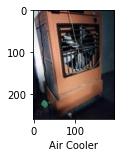

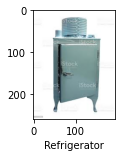

In [20]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled
y_train_scaled = np.array(y_train_scaled, dtype = int)
y_test_scaled = np.array(y_test_scaled, dtype = int)
# print(y)
# print(y)
# print(le.inverse_transform(y))
# x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled
# yt = le.inverse_transform()
# print(yt)
plotter(x_train_scaled, y_train_scaled, 0), plotter(x_test_scaled, y_test_scaled, 0)
y_train_scaled, y_test_scaled

C:\Users\hp\AppData\Local\Temp/ipykernel_15912/54360007.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15, 2))


****************************************************************************************************
(260, 194, 3)
(400, 225, 3)
(21,) (21,)
(260, 194, 3) ()
(194, 3) ()
(21,) ()
****************************************************************************************************
(21,)
(151320,)
(270000,)
[array([0.7254902 , 0.78823529, 0.78431373, ..., 0.05882353, 0.05490196,
        0.09411765])
 array([0.95686275, 1.        , 1.        , ..., 0.66666667, 0.69803922,
        0.7254902 ])
 array([0.94117647, 0.96078431, 0.99607843, ..., 0.34117647, 0.36470588,
        0.50196078])
 array([0.32941176, 0.33333333, 0.31764706, ..., 0.31764706, 0.41176471,
        0.48235294])
 array([0.40784314, 0.40392157, 0.44313725, ..., 0.48627451, 0.4745098 ,
        0.5372549 ])
 array([0.95686275, 0.99607843, 1.        , ..., 0.3372549 , 0.37254902,
        0.47843137])
 array([0.99215686, 0.99215686, 0.99215686, ..., 0.14117647, 0.53333333,
        0.34509804])
 array([0.81568627, 0.80784314, 0.80

C:\Users\hp\AppData\Local\Temp/ipykernel_15912/1161164421.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train_scaled = np.array([train[i][0] for i in range(21)])
C:\Users\hp\AppData\Local\Temp/ipykernel_15912/1161164421.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test_scaled = np.array([test[i][0] for i in range(9)])
C:\Users\hp\AppData\Local\Temp/ipykernel_15912/1161164421.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

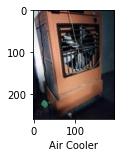

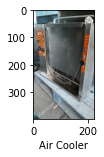

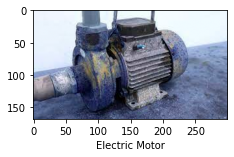

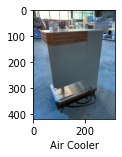

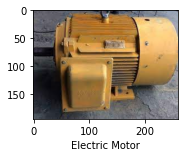

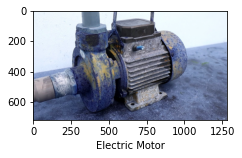

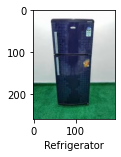

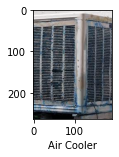

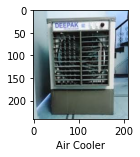

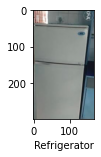

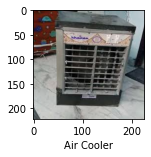

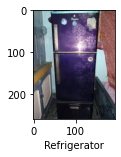

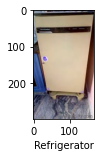

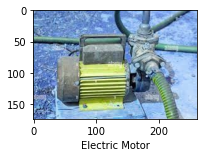

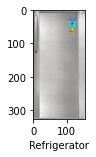

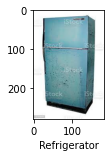

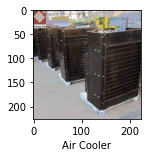

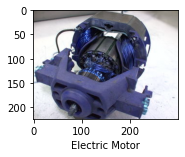

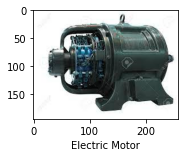

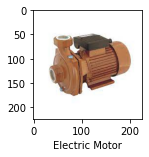

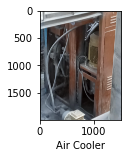

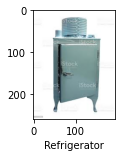

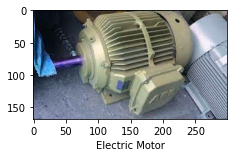

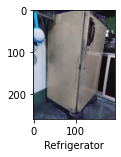

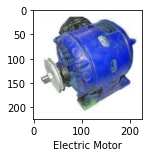

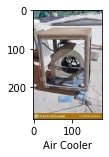

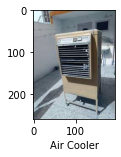

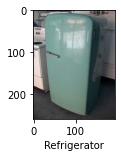

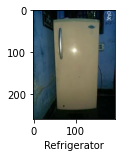

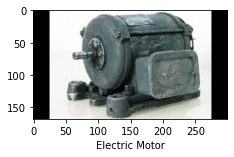

In [38]:
# model = CNN_seq_clf.fit(np.asarray(x_train_scaled, dtype = float), np.asarray(y_train, dtype = float), epochs = 500, batch_size = 64)

train = [plotter(x_train_scaled, y_train_scaled, i) for i in range(21)]
test = [plotter(x_test_scaled, y_test_scaled, i) for i in range(9)]
# print(train)
# print(test)
# model = CNN_seq_clf.fit(np.asarray(x_train_scaled, dtype = float), np.asarray(y_train_scaled, dtype = int), epochs = 500, batch_size = 64)

# x_scaled


# print(x_train_scaled.shape, y_train_scaled.shape)
# model = CNN_seq_clf.fit(np.asarray(x_train_scaled, dtype = object).flatten(), np.asarray(y_train_scaled, dtype = float), epochs = 500, batch_size = 64)


# x_train_scaled = x_train_scaled.flatten()


# y_train_scaled = np.asarray(y_train_scaled).astype(np.float32)

x_train_scaled = np.array([train[i][0] for i in range(21)])
x_test_scaled = np.array([test[i][0] for i in range(9)])

print('*' * 100)
print(x_train_scaled[0].shape)
print(x_train_scaled[1].shape)
print(x_train_scaled.shape, y_train_scaled.shape)
print(x_train_scaled[0].shape, y_train_scaled[0].shape)
print(x_train_scaled[0][0].shape, y_train_scaled[0].shape)
print(x_train_scaled.shape, y_train_scaled[0].shape)
print('*' * 100)
# x_train_flat = np.array([x_train_scaled[i].flatten() for i in range(21)], dtype = object)
x_train_flat = np.array([x_train_scaled[i].flatten() for i in range(21)])
print(x_train_flat.shape)
print(x_train_flat[0].shape)
print(x_train_flat[1].shape)
print(x_train_flat)
# model = CNN_seq_clf.fit(x_train_scaled, y_train_scaled, epochs = 500, batch_size = 64)
model = CNN_seq_clf.fit(x_train_flat, y_train_scaled, epochs = 500, batch_size = 64)
# model = CNN_seq_clf.fit([1] * 896, [1] * 896, epochs = 500, batch_size = 64)

In [ ]:
x_test_flat = np.array([x_test_scaled[i].flatten() for i in range(9)], dtype = object)
print(x_test_flat)
print(x_test_flat.shape)
print(x_test_flat[0].shape)
y_pred = CNN_seq_clf.predict(x_test_flat[:][:100000])